# This code plots the comparison of numerical vs experimental PLF fronts assuming that data files for both fronts are given. The differences between the two fronts are also calculated.

DFM avg error (FF): 0.041221480818273114
SBM avg error (FF): 0.1043358744073981


DFM avg error (PF): 0.1526765558582518
SBM avg error (PF): 0.09364384533996069


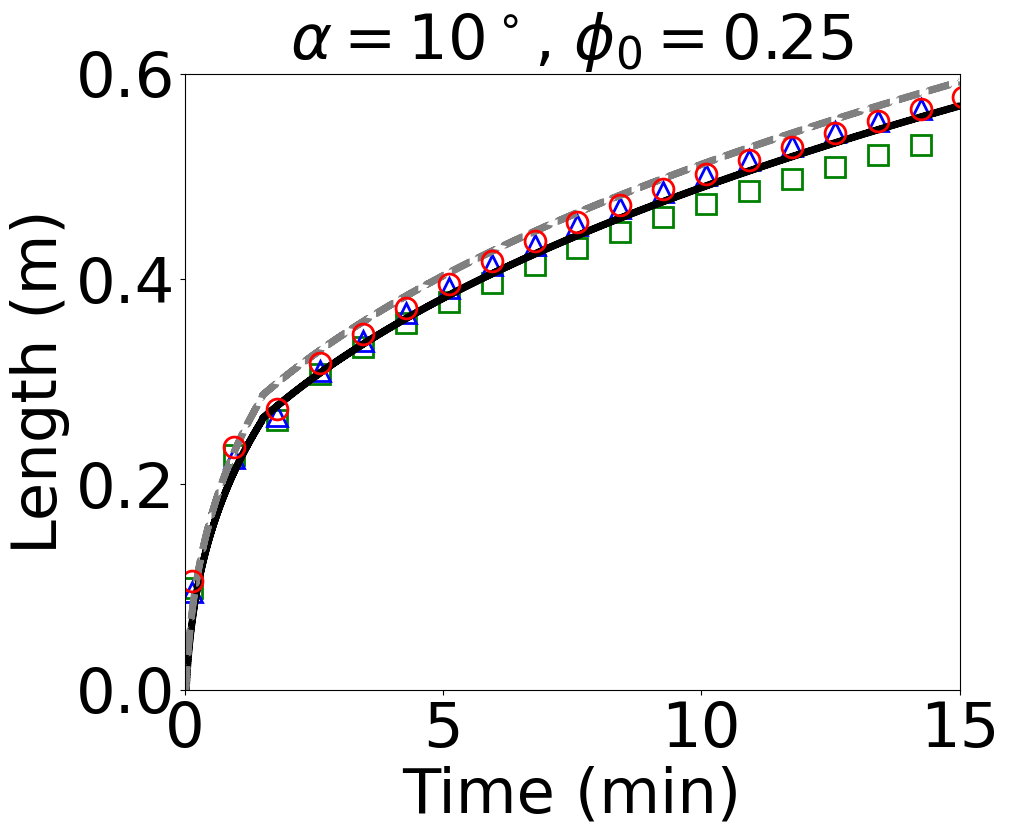

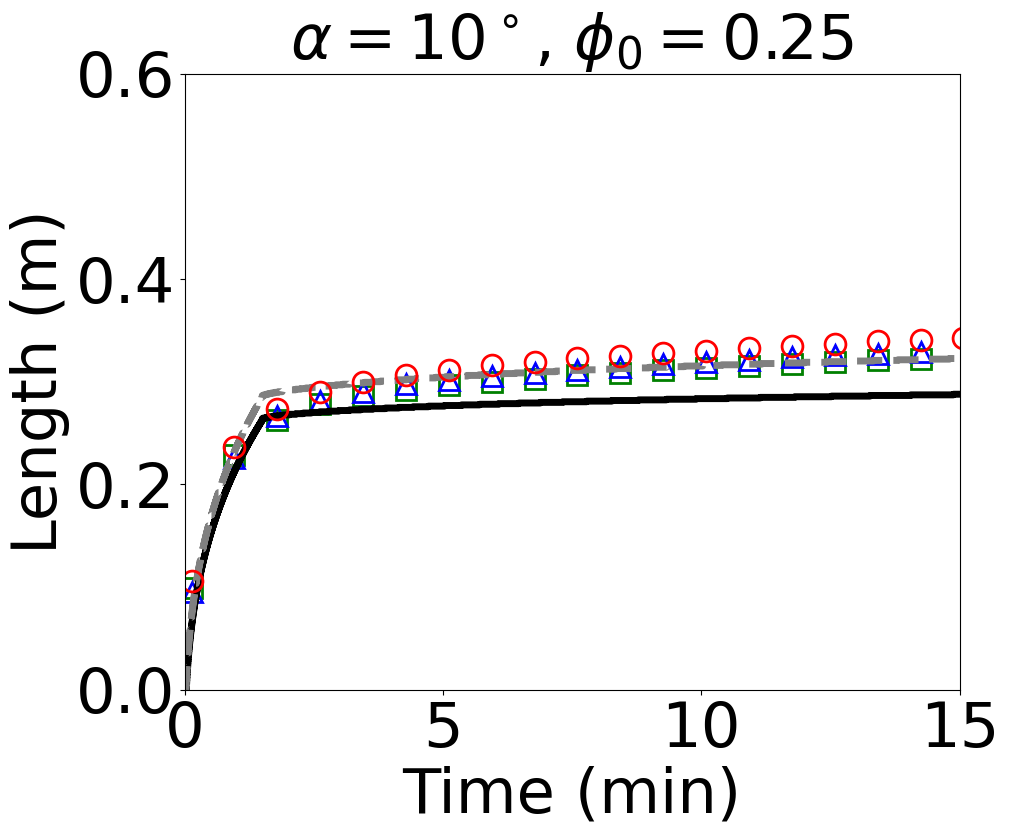

In [27]:
# Import necessary libraries
import pickle
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Specify the angles and concentrations for which plots are generated
# You can include multiple values in the arrays
angles = [10]
concs = [0.25]

# Load specific data downloaded from Box
# Thanks to the 2014 REU team
import scipy.io as sio
phi_20 = sio.loadmat('GSB5_phi03_alpha20_100ml.mat')
ff_20 = phi_20['pdmsAvFrontcm']
pf_20 = phi_20['colorAvFrontcm']
phi_15 = sio.loadmat('100gsb5_phi02_alpha15_100ml.mat')
ff_15 = phi_15['pdmsAvFrontcm']
pf_15 = phi_15['colorAvFrontcm']

for angle in angles:
    for conc in concs:
        
        # This data can be generated by our other code
        # Numerical fronts 
        dir_path = 'new_folder/angle' + str(angle) + ' conc.' + str(conc) + '/'

        with open(dir_path+'dfm_l_front', "rb") as a:
            dfm_l_front = np.array(pickle.load(a))

        with open(dir_path+'dfm_p_front', "rb") as b:
            dfm_p_front = np.array(pickle.load(b))

        with open(dir_path+'sbm_l_front', "rb") as c:
            sbm_l_front = np.array(pickle.load(c))

        with open(dir_path+'sbm_p_front', "rb") as d:
            sbm_p_front = np.array(pickle.load(d))
        
        with open(dir_path+'time', "rb") as e:
            time = np.array(pickle.load(e))
        
        # Experimental fronts
        # Note the units; sometimes scaling is needed
        with open('BP_' + str(int(conc * 100)) + 'vf_' + str(angle) + 'deg_1_exp.bin', "rb") as a:
            exp_data_1 = pickle.load(a)
            time_exp_1 = exp_data_1['time'] / 60
            ff_exp_1 = exp_data_1['fluidfront'] / 100
            pf_exp_1 = exp_data_1['particlefront'] / 100
            for i in range(len(ff_exp_1)):
                if math.isnan(ff_exp_1[i]):
                    ff_exp_1[i] = pf_exp_1[i]
            
        with open('BP_' + str(int(conc * 100)) + 'vf_' + str(angle) + 'deg_2_exp.bin', "rb") as a:
            exp_data_2 = pickle.load(a)
            time_exp_2 = exp_data_2['time'] / 60
            ff_exp_2 = exp_data_2['fluidfront'] / 100
            pf_exp_2 = exp_data_2['particlefront'] / 100
            for i in range(len(ff_exp_2)):
                if math.isnan(ff_exp_2[i]):
                    ff_exp_2[i] = pf_exp_2[i]
            
        with open('BP_' + str(int(conc * 100)) + 'vf_' + str(angle) + 'deg_3_exp.bin', "rb") as a:
            exp_data_3 = pickle.load(a)
            time_exp_3 = exp_data_3['time'] / 60
            ff_exp_3 = exp_data_3['fluidfront'] / 100
            pf_exp_3 = exp_data_3['particlefront'] / 100
            for i in range(len(ff_exp_3)):
                if math.isnan(ff_exp_3[i]):
                    ff_exp_3[i] = pf_exp_3[i]
        
        fig_1, ax_1 = plt.subplots(figsize=(10, 8))
        ax_1.plot(time, dfm_l_front, linestyle = '-', linewidth = 5, label = 'DFM Liquid Front', color = 'black')
        ax_1.plot(time, sbm_l_front, linestyle = '--', linewidth = 5, label = 'SBM Liquid Front', color = 'grey')
#         Use this line to plot experimental fronts from Box
#         ax_1.scatter(ff_20[0] / 60, ff_20[1] / 100, marker = 'o', s = 5, label = 'Experiment Liquid Front', color = 'red')
#.        Also comment out the experimental fronts lines above
        ax_1.plot(time_exp_1[::3], ff_exp_1[::3], linestyle = 'none', marker = '^', mew = 2, fillstyle = 'none', markersize = 15, label = 'Experiment Liquid Front 1', color = 'blue', zorder = 1)
        ax_1.plot(time_exp_2[::3], ff_exp_2[::3], linestyle = 'none', marker = 's', mew = 2, fillstyle = 'none', markersize = 15, label = 'Experiment Liquid Front 2', color = 'green', zorder = 0)
        ax_1.plot(time_exp_3[::3], ff_exp_3[::3], linestyle = 'none', marker = 'o', mew = 2, fillstyle = 'none', markersize = 15, label = 'Experiment Liquid Front 3', color = 'red', zorder = 2)
        # Code to compute differences between numerical and experimental fronts
        # Cubic spline interpolation is done on numerical data
        # Huppert regime is ignored
        time_exp_min = min(time_exp_1[-1], time_exp_2[-1], time_exp_3[-1])
        interp_time = time[time < time_exp_min]
        interp_l_front = dfm_l_front[time < time_exp_min]
        dfm = CubicSpline(interp_time, interp_l_front)
        error_1 = np.max(np.abs(dfm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) - ff_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) / dfm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]))
        error_2 = np.max(np.abs(dfm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) - ff_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) / dfm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]))
        error_3 = np.max(np.abs(dfm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) - ff_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) / dfm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]))
        print('DFM avg error (FF):', (error_1 + error_2 + error_3) / 3)
        interp_l_front = sbm_l_front[time < time_exp_min]
        sbm = CubicSpline(interp_time, interp_l_front)
        error_1 = np.max(np.abs(sbm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) - ff_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) / sbm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]))
        error_2 = np.max(np.abs(sbm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) - ff_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) / sbm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]))
        error_3 = np.max(np.abs(sbm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) - ff_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) / sbm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]))
        print('SBM avg error (FF):', (error_1 + error_2 + error_3) / 3)
        plt.xlabel('Time (min)', fontsize = 45)
        plt.ylabel('Length (m)', fontsize = 45)
        plt.xlim([0, 15])
        plt.ylim([0, 0.6])
        ax_1.tick_params(axis='x', labelsize = 45)
        ax_1.tick_params(axis='y', labelsize = 45)
        # plt.legend(fontsize = 15) # legend takes up too much space
        plt.title(r'$\alpha=$' + str(angle) + r'$^\circ$' + ', ' + r'$\phi_0=$' + str(conc), fontsize = 45)
        
        print('\n')
        
        fig_2, ax_2 = plt.subplots(figsize=(10, 8))
        ax_2.plot(time, dfm_p_front, linestyle = '-', linewidth = 5, label = 'DFM Particle Front', color = 'black')
        ax_2.plot(time, sbm_p_front, linestyle = '--', linewidth = 5, label = 'SBM Particle Front', color = 'grey')
#.        Same logic as above
#         ax_2.scatter(pf_20[0] / 60, pf_20[1] / 100, marker = 'o', s = 5, label = 'Experiment Particle Front', color = 'blue')
        ax_2.plot(time_exp_1[::3], pf_exp_1[::3], linestyle = 'none', marker = '^', mew = 2, fillstyle = 'none', markersize = 15, label = 'Experiment Particle Front 1', color = 'blue', zorder = 1)
        ax_2.plot(time_exp_2[::3], pf_exp_2[::3], linestyle = 'none', marker = 's', mew = 2, fillstyle = 'none', markersize = 15, label = 'Experiment Particle Front 2', color = 'green', zorder = 0)
        ax_2.plot(time_exp_3[::3], pf_exp_3[::3], linestyle = 'none', marker = 'o', mew = 2, fillstyle = 'none', markersize = 15, label = 'Experiment Particle Front 3', color = 'red', zorder = 2)
        # Calculate differences
        time_exp_min = min(time_exp_1[-1], time_exp_2[-1], time_exp_3[-1])
        interp_time = time[time < time_exp_min]
        interp_p_front = dfm_p_front[time < time_exp_min]
        dfm = CubicSpline(interp_time, interp_p_front)
        error_1 = np.max(np.abs(dfm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) - pf_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) / dfm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]))
        error_2 = np.max(np.abs(dfm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) - pf_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) / dfm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]))
        error_3 = np.max(np.abs(dfm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) - pf_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) / dfm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]))
        print('DFM avg error (PF):', (error_1 + error_2 + error_3) / 3)
        interp_p_front = sbm_p_front[time < time_exp_min]
        sbm = CubicSpline(interp_time, interp_p_front)
        error_1 = np.max(np.abs(sbm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) - pf_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]) / sbm(time_exp_1[(time_exp_1 >= 1.5) & (time_exp_1 <= time_exp_min)]))
        error_2 = np.max(np.abs(sbm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) - pf_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]) / sbm(time_exp_2[(time_exp_2 >= 1.5) & (time_exp_2 <= time_exp_min)]))
        error_3 = np.max(np.abs(sbm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) - pf_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]) / sbm(time_exp_3[(time_exp_3 >= 1.5) & (time_exp_3 <= time_exp_min)]))
        print('SBM avg error (PF):', (error_1 + error_2 + error_3) / 3)
        plt.xlabel('Time (min)', fontsize = 45)
        plt.ylabel('Length (m)', fontsize = 45)
        plt.xlim([0, 15])
        plt.ylim([0, 0.6])
        ax_2.tick_params(axis='x', labelsize = 45)
        ax_2.tick_params(axis='y', labelsize = 45)
#         plt.legend(fontsize = 20)
        plt.title(r'$\alpha=$' + str(angle) + r'$^\circ$' + ', ' + r'$\phi_0=$' + str(conc), fontsize = 45)

DFM avg error (FF): 0.06069394404960082
SBM avg error (FF): 0.13271743944128786


DFM avg error (PF): 0.1455680114373547
SBM avg error (PF): 0.1745121127163053


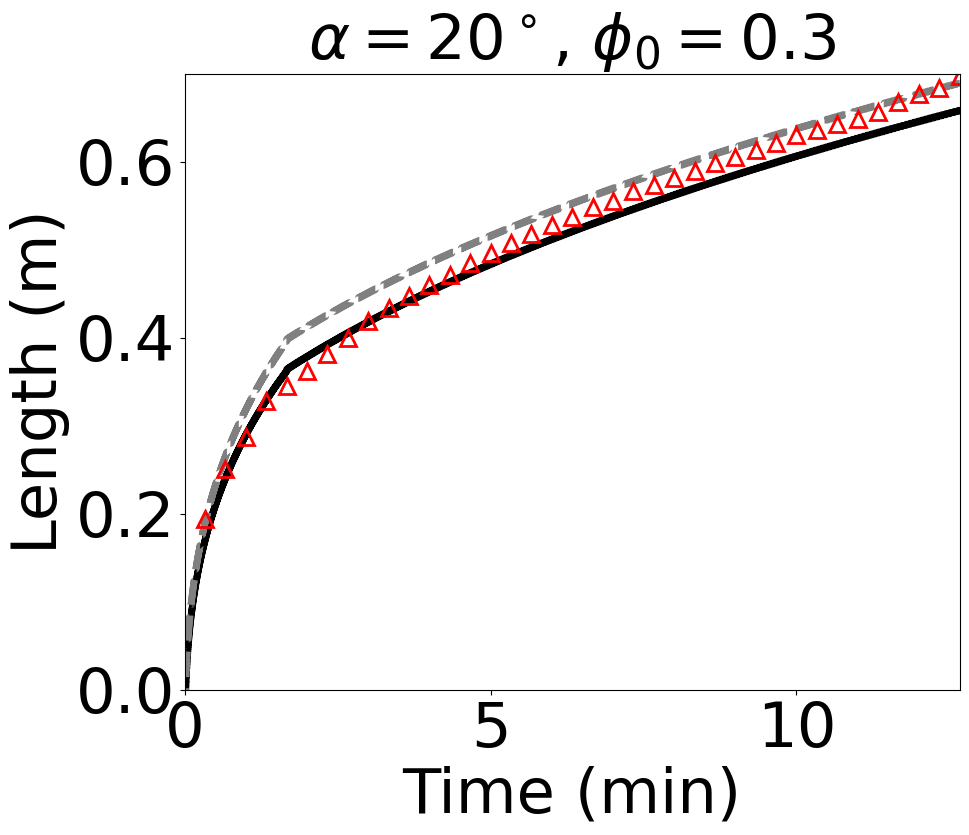

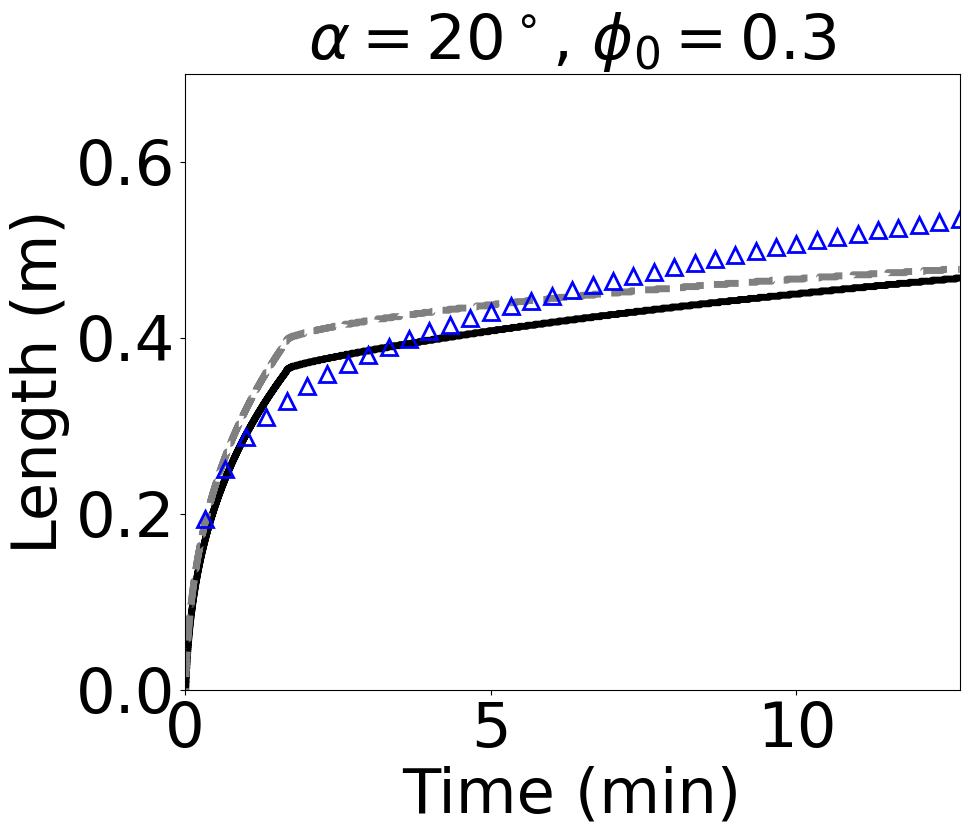

In [32]:
# Same code as above but used for a different set of parameters
import pickle
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
angles = [20]
concs = [0.3]

import scipy.io as sio
phi_20 = sio.loadmat('GSB5_phi03_alpha20_100ml.mat')
ff_20 = phi_20['pdmsAvFrontcm']
pf_20 = phi_20['colorAvFrontcm']
phi_15 = sio.loadmat('100gsb5_phi02_alpha15_100ml.mat')
ff_15 = phi_15['pdmsAvFrontcm']
pf_15 = phi_15['colorAvFrontcm']

for angle in angles:
    for conc in concs:
    
        dir_path = 'new_folder/angle' + str(angle) + ' conc.' + str(conc) + '/'

        with open(dir_path+'dfm_l_front', "rb") as a:
            dfm_l_front = np.array(pickle.load(a))

        with open(dir_path+'dfm_p_front', "rb") as b:
            dfm_p_front = np.array(pickle.load(b))

        with open(dir_path+'sbm_l_front', "rb") as c:
            sbm_l_front = np.array(pickle.load(c))

        with open(dir_path+'sbm_p_front', "rb") as d:
            sbm_p_front = np.array(pickle.load(d))
        
        with open(dir_path+'time', "rb") as e:
            time = np.array(pickle.load(e))
        
#         with open('BP_' + str(int(conc * 100)) + 'vf_' + str(angle) + 'deg_1_exp.bin', "rb") as a:
#             exp_data_1 = pickle.load(a)
#             time_exp_1 = exp_data_1['time'] / 60
#             ff_exp_1 = exp_data_1['fluidfront'] / 100
#             pf_exp_1 = exp_data_1['particlefront'] / 100
#             for i in range(len(ff_exp_1)):
#                 if math.isnan(ff_exp_1[i]):
#                     ff_exp_1[i] = pf_exp_1[i]
            
#         with open('BP_' + str(int(conc * 100)) + 'vf_' + str(angle) + 'deg_2_exp.bin', "rb") as a:
#             exp_data_2 = pickle.load(a)
#             time_exp_2 = exp_data_2['time'] / 60
#             ff_exp_2 = exp_data_2['fluidfront'] / 100
#             pf_exp_2 = exp_data_2['particlefront'] / 100
#             for i in range(len(ff_exp_2)):
#                 if math.isnan(ff_exp_2[i]):
#                     ff_exp_2[i] = pf_exp_2[i]
            
#         with open('BP_' + str(int(conc * 100)) + 'vf_' + str(angle) + 'deg_3_exp.bin', "rb") as a:
#             exp_data_3 = pickle.load(a)
#             time_exp_3 = exp_data_3['time'] / 60
#             ff_exp_3 = exp_data_3['fluidfront'] / 100
#             pf_exp_3 = exp_data_3['particlefront'] / 100
#             for i in range(len(ff_exp_3)):
#                 if math.isnan(ff_exp_3[i]):
#                     ff_exp_3[i] = pf_exp_3[i]
        
        fig_1, ax_1 = plt.subplots(figsize=(10, 8))
        ax_1.plot(time[time <= ff_20[0][::20][-1] / 60], dfm_l_front[time <= ff_20[0][::20][-1] / 60], linestyle = '-', linewidth = 5, label = 'DFM Liquid Front', color = 'black')
        ax_1.plot(time[time <= ff_20[0][::20][-1] / 60], sbm_l_front[time <= ff_20[0][::20][-1] / 60], linestyle = '--', linewidth = 5, label = 'SBM Liquid Front', color = 'grey')
        ax_1.plot(ff_20[0][::20] / 60, ff_20[1][::20] / 100, linestyle = 'none', marker = '^', fillstyle = 'none', markersize = 12, mew = 2, label = 'Experiment Liquid Front', color = 'red')
        time_exp_min = ff_20[0][-1] / 60
        interp_time = time[time < time_exp_min]
        interp_l_front = dfm_l_front[time < time_exp_min]
        dfm = CubicSpline(interp_time, interp_l_front)
        error = np.max(np.abs(dfm(ff_20[0][(ff_20[0] / 60 >= 1.5) & (ff_20[0] / 60 <= time_exp_min)] / 60) - ff_20[1][(ff_20[0] / 60 >= 1.5) & (ff_20[0] / 60 <= time_exp_min)] / 100) / dfm(ff_20[0][(ff_20[0] / 60 >= 1.5) & (ff_20[0] / 60 <= time_exp_min)] / 60))
        print('DFM avg error (FF):', error)
        interp_l_front = sbm_l_front[time < time_exp_min]
        sbm = CubicSpline(interp_time, interp_l_front)
        error = np.max(np.abs(sbm(ff_20[0][(ff_20[0] / 60 >= 1.5) & (ff_20[0] / 60 <= time_exp_min)] / 60) - ff_20[1][(ff_20[0] / 60 >= 1.5) & (ff_20[0] / 60 <= time_exp_min)] / 100) / sbm(ff_20[0][(ff_20[0] / 60 >= 1.5) & (ff_20[0] / 60 <= time_exp_min)] / 60))
        print('SBM avg error (FF):', error)
        plt.xlabel('Time (min)', fontsize = 45)
        plt.ylabel('Length (m)', fontsize = 45)
        plt.xlim([0, ff_20[0][::20][-1] / 60])
        plt.ylim([0, 0.7])
        ax_1.tick_params(axis='x', labelsize = 45)
        ax_1.tick_params(axis='y', labelsize = 45)
        # plt.legend(fontsize = 15)
        plt.title(r'$\alpha=$' + str(angle) + r'$^\circ$' + ', ' + r'$\phi_0=$' + str(conc), fontsize = 45)
        
        print('\n')
        
        fig_2, ax_2 = plt.subplots(figsize=(10, 8))
        ax_2.plot(time[time <= pf_20[0][::20][-1] / 60], dfm_p_front[time <= pf_20[0][::20][-1] / 60], linestyle = '-', linewidth = 5, label = 'DFM Particle Front', color = 'black')
        ax_2.plot(time[time <= pf_20[0][::20][-1] / 60], sbm_p_front[time <= pf_20[0][::20][-1] / 60], linestyle = '--', linewidth = 5, label = 'SBM Particle Front', color = 'grey')
        ax_2.plot(pf_20[0][::20] / 60, pf_20[1][::20] / 100, linestyle = 'none', marker = '^', fillstyle = 'none', markersize = 12, mew = 2, label = 'Experiment Particle Front', color = 'blue')
        time_exp_min = pf_20[0][-1] / 60
        interp_time = time[time < time_exp_min]
        interp_p_front = dfm_p_front[time < time_exp_min]
        dfm = CubicSpline(interp_time, interp_p_front)
        error = np.max(np.abs(dfm(pf_20[0][(pf_20[0] / 60 >= 1.5) & (pf_20[0] / 60 <= time_exp_min)] / 60) - pf_20[1][(pf_20[0] / 60 >= 1.5) & (pf_20[0] / 60 <= time_exp_min)] / 100) / dfm(pf_20[0][(pf_20[0] / 60 >= 1.5) & (pf_20[0] / 60 <= time_exp_min)] / 60))
        print('DFM avg error (PF):', error)
        interp_p_front = sbm_p_front[time < time_exp_min]
        sbm = CubicSpline(interp_time, interp_p_front)
        error = np.max(np.abs(sbm(pf_20[0][(pf_20[0] / 60 >= 1.5) & (pf_20[0] / 60 <= time_exp_min)] / 60) - pf_20[1][(pf_20[0] / 60 >= 1.5) & (pf_20[0] / 60 <= time_exp_min)] / 100) / sbm(pf_20[0][(pf_20[0] / 60 >= 1.5) & (pf_20[0] / 60 <= time_exp_min)] / 60))
        print('SBM avg error (PF):', error)
        plt.xlabel('Time (min)', fontsize = 45)
        plt.ylabel('Length (m)', fontsize = 45)
        plt.xlim([0, pf_20[0][::20][-1] / 60])
        plt.ylim([0, 0.7])
        ax_2.tick_params(axis='x', labelsize = 45)
        ax_2.tick_params(axis='y', labelsize = 45)
        # plt.legend(fontsize = 15)
        plt.title(r'$\alpha=$' + str(angle) + r'$^\circ$' + ', ' + r'$\phi_0=$' + str(conc), fontsize = 45)